# Problem Statement

Boom Bikes are interested to know Which variables are significant in predicting the demand for shared bikes and 
How well these variables describe the bike demands after the end of ongoing quarantine situation ends across the nation due to Covid-19 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#  Reading and Understanding the Data

In [2]:
day = pd.read_csv("day.csv")

In [3]:
# Now we shall check how the data is present in the file.
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# lets check info, shape and descibe to have a better understanding of the data 
day.shape

(730, 16)

In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


From above we can clearly see that there are no null values in any column of the given data set.

In [6]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


As per the data dictonary provided seasons and weathersit are categorical data and so we shall convert the feature values into categorical string values

In [7]:
day['season']=day.season.replace({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })

In [8]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
day['weathersit']=day.weathersit.replace({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})

In [10]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


As we can see that weathersit and season has been updated in the data set as per our requirement.

In [11]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 91.4+ KB


From above data set and dictonary we can also observe that months and days are in number format which are categorical variables so we shall convert them as we have done for above variables.

In [12]:
day['mnth']=day.mnth.replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
day['weekday']=day.weekday.replace({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [13]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


for better understanding of data let's change column name 'mnth' to 'month', 'dteday' to 'date', 'yr' to 'year', 'hum' to 'humidity' and 'cnt' to 'count'.  

In [14]:
day.rename(columns = {'mnth':'month','dteday':'date','yr':'Year','hum':'humidity','cnt':'count'}, inplace = True) 

In [15]:
day.head()

,instant,date,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


As we can see heading are now better that the previous headings given proper information about the data it holds in a particular column.

In [16]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   date        730 non-null    object 
 2   season      730 non-null    object 
 3   Year        730 non-null    int64  
 4   month       730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  count       730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


# Visualising the Data
Let's try to understanding the data through visualisation.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

## Visualising Numerical Variables

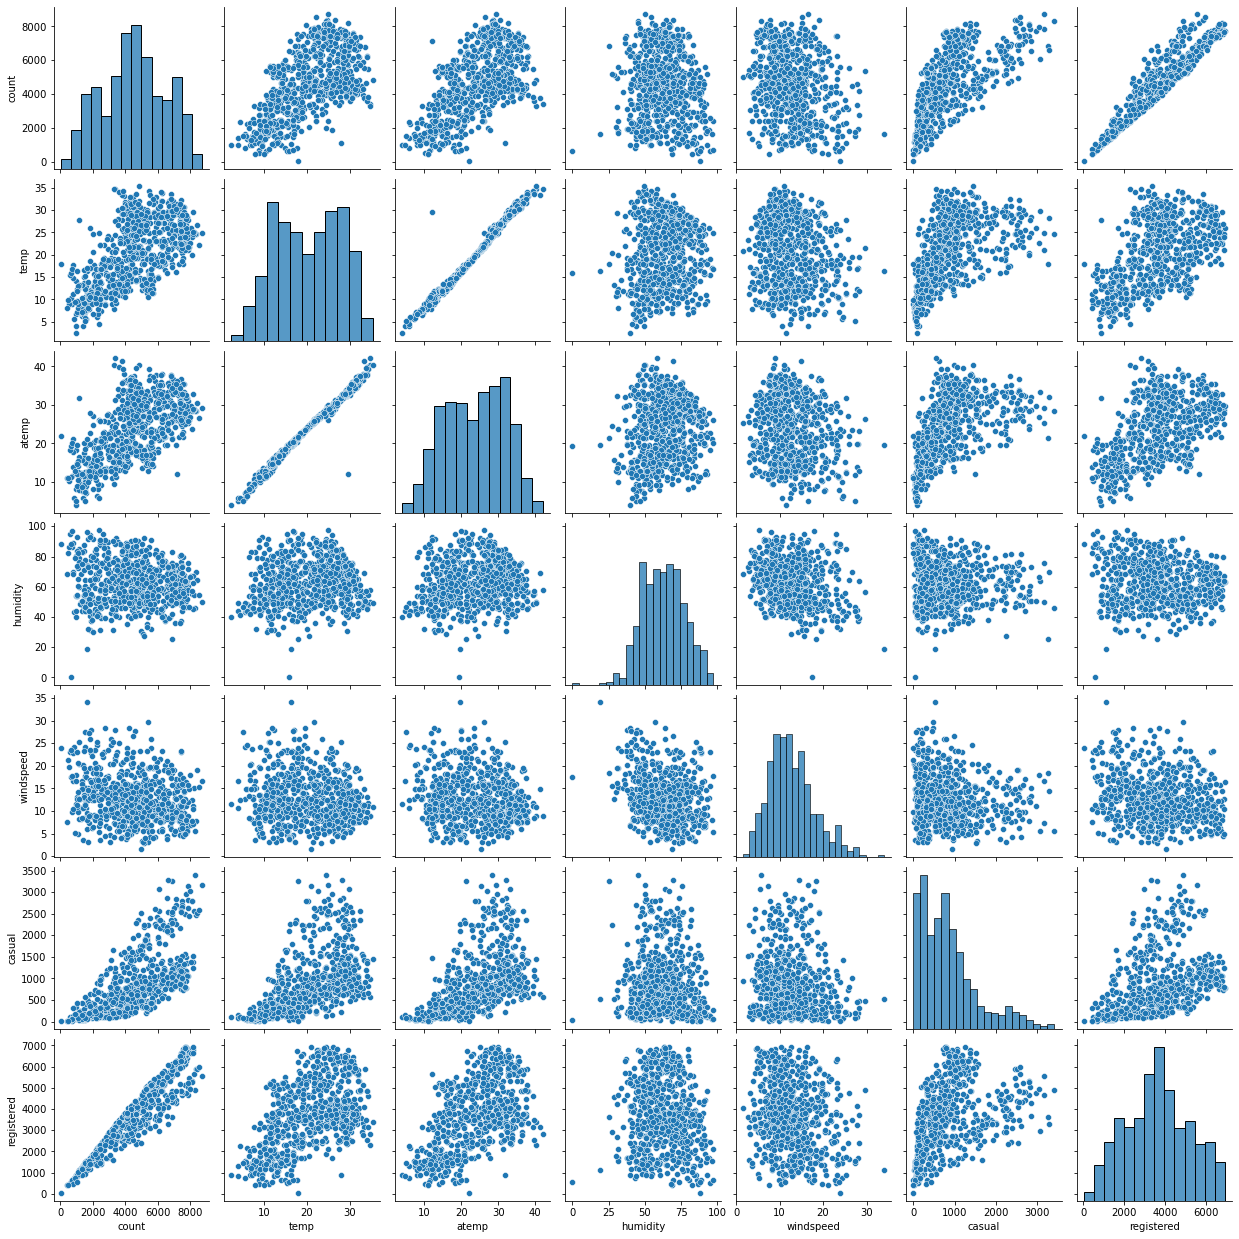

In [17]:
sns.pairplot(day, vars=['count','temp', 'atemp','humidity','windspeed','casual','registered'])
plt.show()

As we can obsereve in the above pair plot that count has positive corealation with actual and feeling temperature and in terms of users registered users has better corelation with count compared to casual users.

## Visualising Categorical Variables 

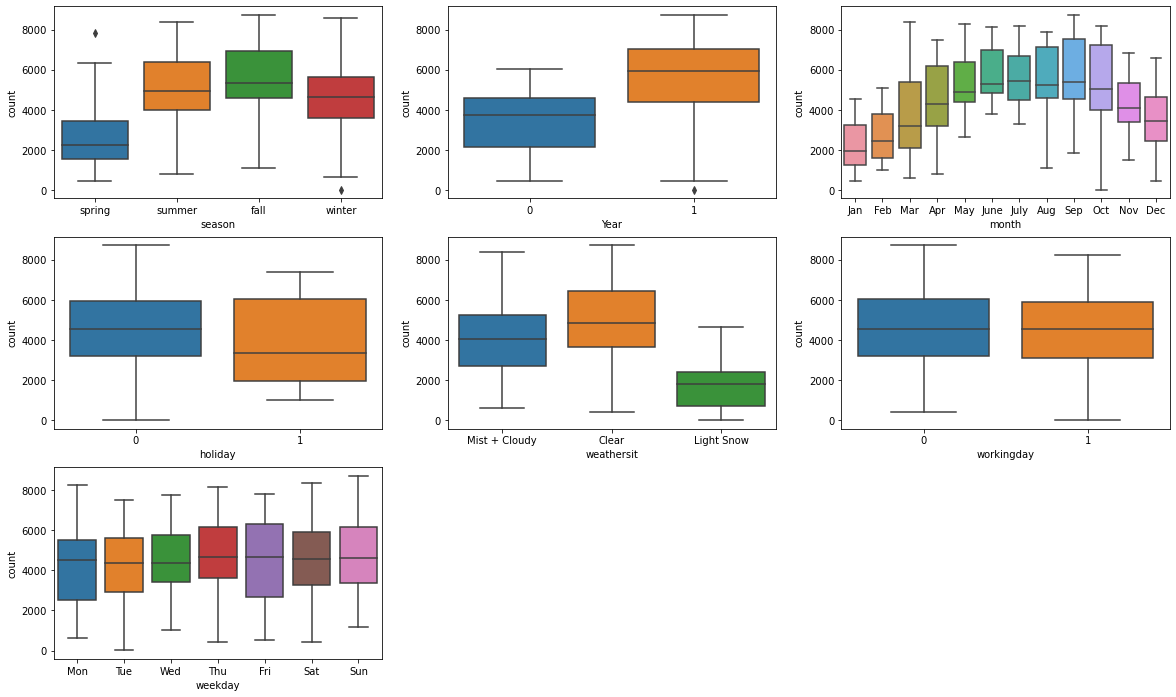

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'count', data = day)
plt.subplot(3,3,2)
sns.boxplot(x = 'Year', y = 'count', data = day)
plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'count', data = day)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'count', data = day)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'count', data = day)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'count', data = day)
plt.subplot(3,3,7)
sns.boxplot(x = 'weekday', y = 'count', data = day)
plt.show()

The plots above shows the following relationships between categorical variables and a Target variable (count).

1) Bike Rentals are more during the Fall season and then in summer

2) There is a significant increase in use of shared bikes in 2019 as compared to 2018.

3) Demand for shared bikes can be seen gradulay increasing from the month of April to September which coincide with hot temperature in USA. 

4) Working day or not there is no visible difference in count for shared bikes demand.

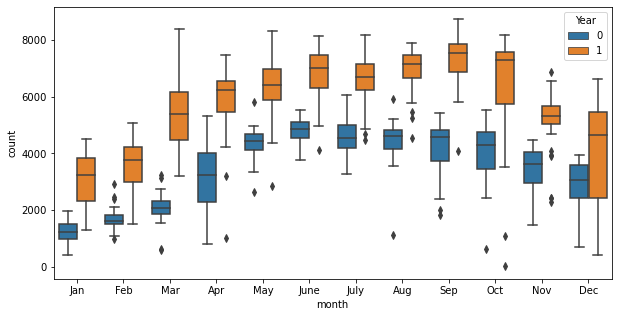

In [19]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'month', y = 'count', hue = 'Year', data = day)
plt.show()

From above we can observe that demand trend for both the years are almost same. 

# Data Preparation

In [20]:
# Get the dummy variables
month=pd.get_dummies(day['month'])
weekday=pd.get_dummies(day['weekday'])
weathersit=pd.get_dummies(day['weathersit'])
season=pd.get_dummies(day['season'])

In [21]:
month.head()

,Apr,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [22]:
# Let's drop the first column from df using 'drop_first = True'
month=pd.get_dummies(day.month,drop_first=True)
weekday=pd.get_dummies(day.weekday,drop_first=True)
weathersit=pd.get_dummies(day.weathersit,drop_first=True)
season=pd.get_dummies(day.season,drop_first=True)

In [23]:
# Add the results to the original dataframe
day = pd.concat([day, month, weekday, weathersit, season], axis = 1)

In [24]:
# Now let's see the head of our dataframe.

day.head()

,instant,date,season,Year,month,holiday,weekday,workingday,weathersit,temp,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,...,0,0,0,0,0,0,1,1,0,0
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,...,0,0,0,1,0,0,1,1,0,0
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,...,0,0,0,0,1,0,0,1,0,0
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,...,0,0,1,0,0,0,0,1,0,0
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,...,0,0,0,0,0,0,0,1,0,0


In [25]:
day.drop(['instant','date','season','month','weekday','weathersit','casual','registered'],axis = 1, inplace = True)

In [26]:
day.head()

,Year,holiday,workingday,temp,atemp,humidity,windspeed,count,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


## Splitting the Data into Training and Testing Sets 

In [27]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the Features

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
# Apply scaler() to all numeric variables
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','count']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [31]:
df_train.head()

,Year,holiday,workingday,temp,atemp,humidity,windspeed,count,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0


In [32]:
df_train.describe()

,Year,holiday,workingday,temp,atemp,humidity,windspeed,count,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


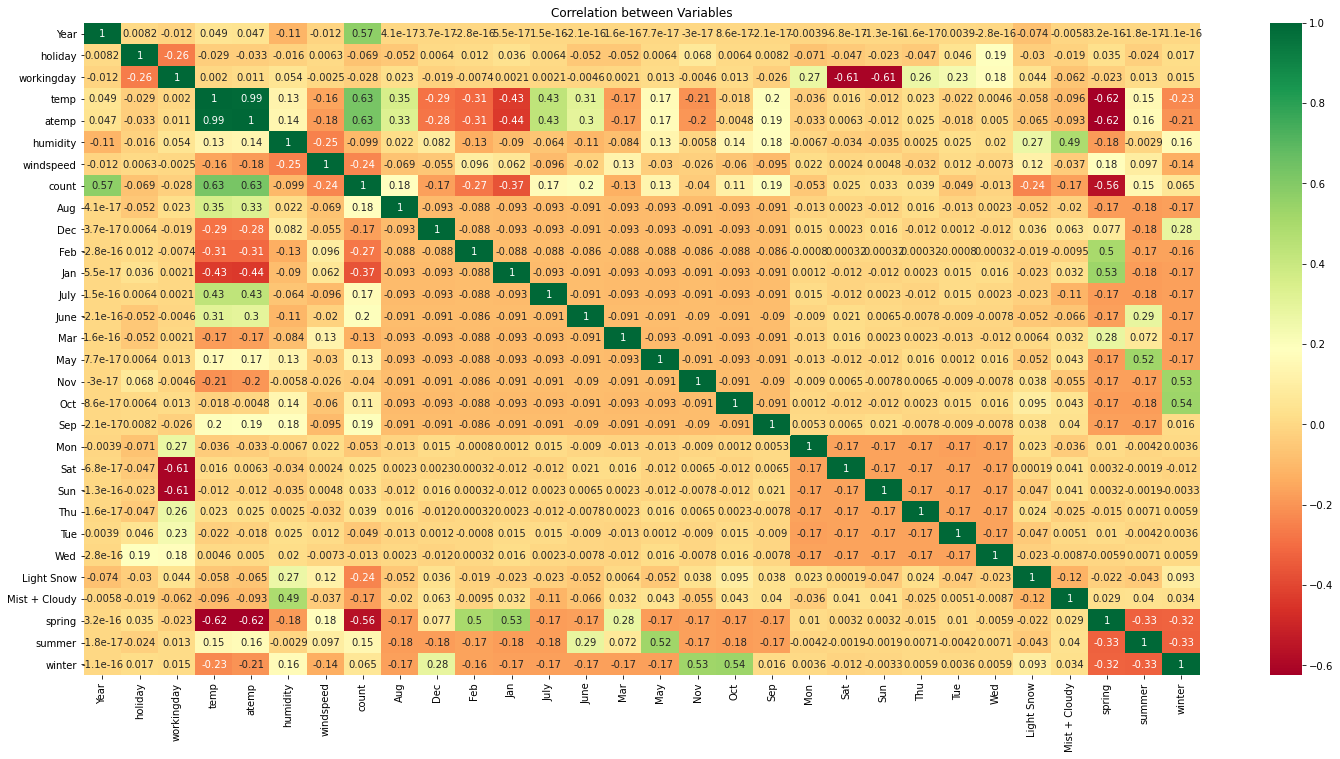

In [42]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(25, 12))
sns.heatmap(day.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

We can see that temperature,Summer season,June to october months are in good correlation with the 'count' variable.

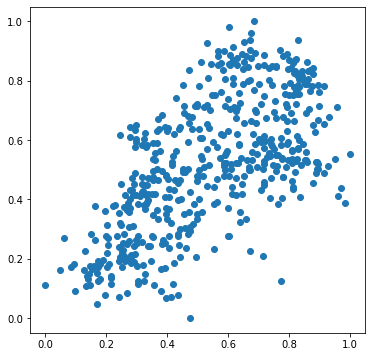

In [34]:
plt.figure(figsize=[6,6])
plt.scatter(df_train['temp'], df_train['count'])
plt.show()

## Dividing into X and Y sets for the model building

In [35]:
y_train = df_train.pop('count')
X_train = df_train

# Building a linear model

In [36]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [37]:
# Check the parameters obtained

lr.params

const    0.169798
temp     0.639952
dtype: float64

In [38]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           5.80e-61
Time:                        23:21:23   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

R-squared value obtained is 0.414. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable

In [43]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'Year']]

In [44]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.079628
temp     0.583559
Year     0.237213
dtype: float64

In [45]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          9.25e-130
Time:                        23:25:24   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.0

We have clearly improved the model as the value of adjusted R-squared as its value has gone up to 0.689 from 0.413. Let's go ahead and add another variable

In [46]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'Year','Sep']]

In [47]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.082990
temp     0.566513
Year     0.237944
Sep      0.067485
dtype: float64

In [48]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     387.4
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          1.27e-130
Time:                        23:31:13   Log-Likelihood:                 342.70
No. Observations:                 510   AIC:                            -677.4
Df Residuals:                     506   BIC:                            -660.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0830      0.015      5.595      0.0

In [49]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'Year','Sep','spring']]

In [50]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const     0.203318
temp      0.404872
Year      0.241369
Sep       0.057836
spring   -0.141680
dtype: float64

In [51]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     364.8
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          2.12e-147
Time:                        23:33:38   Log-Likelihood:                 384.87
No. Observations:                 510   AIC:                            -759.7
Df Residuals:                     505   BIC:                            -738.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.019     10.926      0.0

In [52]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'Year','Sep','spring','Jan']]

In [53]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const     0.208818
temp      0.395305
Year      0.241927
Sep       0.058705
spring   -0.129846
Jan      -0.040692
dtype: float64

In [54]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     294.0
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          7.43e-147
Time:                        23:35:31   Log-Likelihood:                 386.66
No. Observations:                 510   AIC:                            -761.3
Df Residuals:                     504   BIC:                            -735.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2088      0.019     11.113      0.0

In [55]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'Year','Sep','spring','Jan','winter']]

In [56]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const     0.159331
temp      0.453598
Year      0.240932
Sep       0.058703
spring   -0.099898
Jan      -0.033098
winter    0.043058
dtype: float64

In [57]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     249.8
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          2.40e-147
Time:                        23:38:40   Log-Likelihood:                 390.75
No. Observations:                 510   AIC:                            -767.5
Df Residuals:                     503   BIC:                            -737.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1593      0.025      6.252      0.0

In [59]:
y_train_price = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

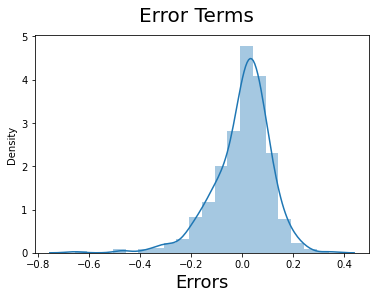

In [60]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Making Predictions Using the Final Model

In [61]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','count']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [62]:
df_test.describe()

,Year,holiday,workingday,temp,atemp,humidity,windspeed,count,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.059361,0.086758,...,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.236840,0.282125,...,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
